# Data Analysis Basics with Salary Analysis

With data and examples from https://www.kaggle.com/code/bilashalder/salaries-data-analysis-practice/data?select=Salaries.csv

This is an intro to data analysis on Kaggle and an exercise of understanding and exploring data.

In [97]:
import pandas as pd

salaries = pd.read_csv('../input/sf-salary-data-2011-2014/Salaries.csv')

/tmp/ipykernel_632859/2824092596.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv('../input/sf-salary-data-2011-2014/Salaries.csv')


# Get the basic sample and description of the dataset

In [98]:
display(salaries.head())
display(salaries.info())

salaries.describe()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


None

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


# Preprocessing

Convert the null, not provided data.

In [102]:
cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']

for col in cols:
    salaries[col] = salaries[col].apply(lambda x: pd.to_numeric(x, errors='coerce'))

salaries.sample(100)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
63399,63400,Anthony OS Calalang II,Transit Operator,33079.77,1815.36,979.60,20409.77,35874.73,56284.50,2012,NaN,San Francisco,NaN
112949,112950,Julie A Lynch,Sergeant 3,137982.14,6216.80,17761.57,43199.80,161960.51,205160.31,2014,NaN,San Francisco,FT
46667,46668,Lauren Eisele,Planner 4-Environmental Review,96107.72,0.00,0.00,38174.58,96107.72,134282.30,2012,NaN,San Francisco,NaN
97584,97585,Sao Mei Hoi,Custodian,55026.00,0.00,401.88,24621.58,55427.88,80049.46,2013,NaN,San Francisco,NaN
48007,48008,Kim Harmon,"Mgr, Unified Family Court Svcs",87195.34,0.00,0.00,40501.25,87195.34,127696.59,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123753,123754,Liam C Curry,Stationary Engineer,78644.90,6812.98,6199.68,32071.62,91657.56,123729.18,2014,NaN,San Francisco,FT
90906,90907,Jonathan Dat Lam,Transit Operator,68127.45,1441.35,1873.11,33355.91,71441.91,104797.82,2013,NaN,San Francisco,NaN
120423,120424,Patrick Casugay,IT Operations Support Admin IV,102787.92,0.00,0.00,37303.53,102787.92,140091.45,2014,NaN,San Francisco,FT
66313,66314,Rene Duenes,Police Officer,17085.00,0.00,0.00,6888.15,17085.00,23973.15,2012,NaN,San Francisco,NaN


In [104]:
salaries.info()

salaries.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [105]:
len(salaries['JobTitle'].unique())

2159

<Figure size 3000x1000 with 0 Axes>

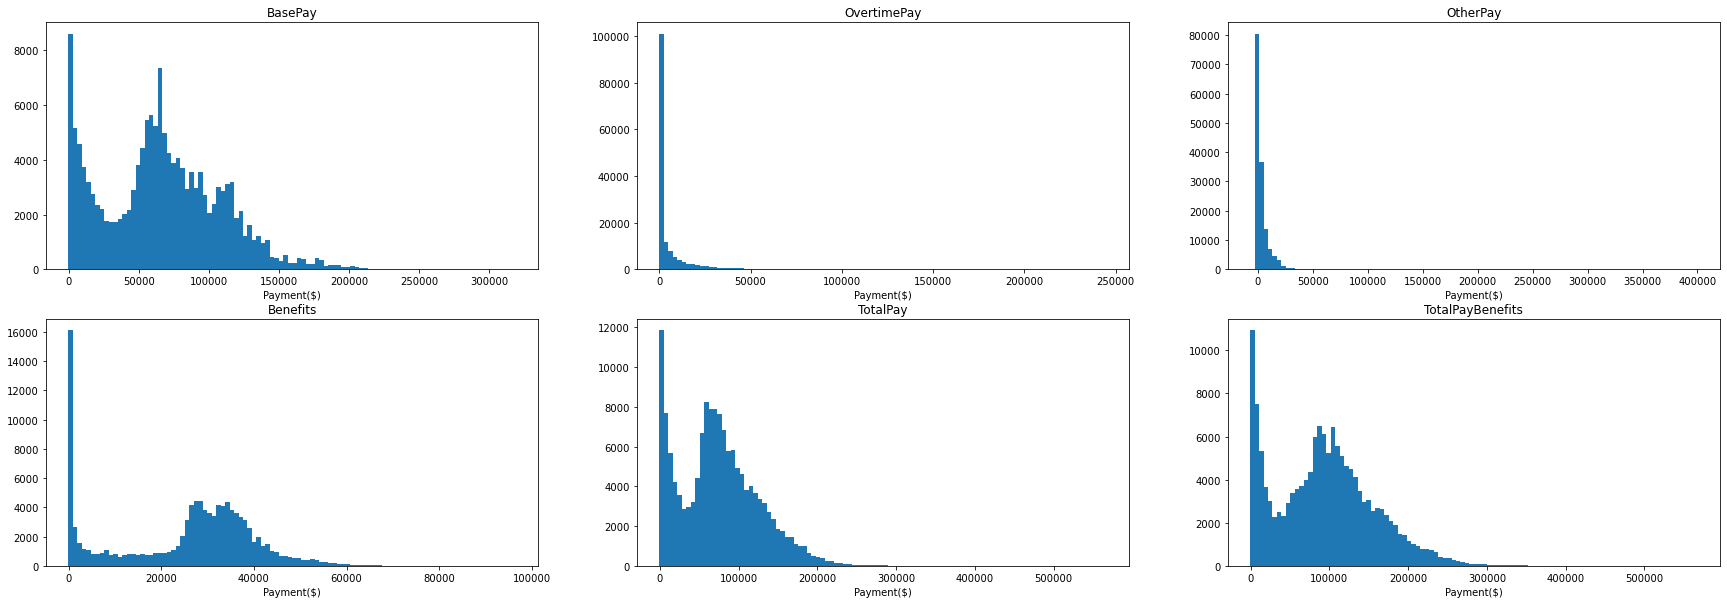

In [120]:
# Explore distribution of data with histogram plots

import matplotlib.pyplot as plt

titles = ('BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits')
nbins = 100
plt.figure(figsize=(30, 10), dpi=100)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

for i, title in enumerate(titles):
    axe = axes[i//3][i%3] 
    
    axe.hist(salaries[title], bins=nbins)
    axe.set_title(title)
    axe.set_xlabel('Payment($)')
    
plt.show()   
